In [6]:
# datasetX, principle components U, the numbers of dimensions to reduce to k
import time
import numpy as np
# sklearn are prohibited
import os
#import sklearn
from scipy import misc
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib.image as mpimg

from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.datasets import fetch_lfw_people
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.decomposition import PCA
from sklearn.svm import SVC
from PIL import Image
import random

load image

In [7]:
path = '/media/chang_1909004/970pro/PL/20seg/' #png
#path = 'PL/2019/05/08/' #jpg
#image= misc.imread(path + filenamelist[0], flatten= 0)

png_pathlist = []
# r=root, d=directories, f = files
for r, d, f in os.walk(path):
    for file in f:
        if '.jpg' in file:
            png_pathlist.append(os.path.join(r, file))

len(png_pathlist)

386840

In [8]:
Start = 0
Stop =  386839
limit = 20000
random.seed(1)
RandomListOfIntegers = [random.randint(Start, Stop) for iter in range(limit)]

In [9]:
len(RandomListOfIntegers)

20000

In [10]:
x = mpimg.imread(png_pathlist[38335])

In [11]:
x[:, :, 0].shape

(1234, 487)

In [12]:
# png_imagelist = []
# #raw_jpg_imagelist = []
# for i in RandomListOfIntegers:
#     image = mpimg.imread(png_pathlist[i])
#     #raw_jpg_imagelist.append(image.flatten())
#     png_imagelist.append(image[:, :, 0].flatten())
# # imagelist 672張圖的(1216, 608)

In [13]:
from multiprocessing import Pool

def read_image(path_index):
    image = mpimg.imread(png_pathlist[path_index])
    return image[:, :, 0].flatten()

p = Pool(processes=18)

png_imagelist = p.map(read_image, RandomListOfIntegers)
p.close()
p.join()

In [14]:
len(png_imagelist)

20000

In [15]:
png_imagelist[0].shape

(600958,)

In [16]:
1234*487

600958

/media/chang_1909004/970pro/PL/20seg/PL_2019_04_27_19425LBE_40_A1M9FM0119_19.jpg


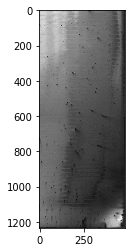

In [17]:
print(png_pathlist[RandomListOfIntegers[0]])
plt.imshow(mpimg.imread(png_pathlist[RandomListOfIntegers[0]]), cmap='gray')

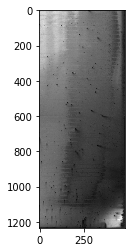

In [18]:
plt.imshow(png_imagelist[0].reshape(mpimg.imread(png_pathlist[RandomListOfIntegers[0]]).shape[0], mpimg.imread(png_pathlist[RandomListOfIntegers[0]]).shape[1]), cmap= 'gray')

image segmentation

In [19]:
# num = 0
# rownum = 20
# colnum = 4
# noise_segmentation_path = "noise_segmentation/"
# rowheight = image[0].shape[0] // rownum
# colwidth = image[0].shape[1] // colnum
# for img_path in png_pathlist:
#     img = plt.imread(img_path) #(2469, 4870)
#     seg_num = 0
#     for r in range(rownum):
#         for c in range(colnum):
#             x = img[img.shape[0]//rownum*r:img.shape[0]//rownum*(r+1), img.shape[1]//colnum*c:img.shape[1]//colnum*(c+1)]
# #             box = (c * colwidth, r * rowheight, (c + 1) * colwidth, (r + 1) * rowheight)
# #             img.crop(box).save(os.path.join(dstpath, basename + '_' + str(num) + '.' + ext), ext)
#             seg_num += 1
#             plt.imsave(noise_segmentation_path + img_path[-20:-4] + "_" + str(seg_num) + ".png", x, cmap='gray')
#             num = num + 1

load noise_segmentation image

In [20]:
# path = '/media/chang_1909004/970pro/PL/20seg_PCA/'
# #image= misc.imread(path + filenamelist[0], flatten= 0)

# png_pathlist = []
# # r=root, d=directories, f = files
# for r, d, f in os.walk(path):
#     for file in f:
#         if '.png' in file:
#             png_pathlist.append(os.path.join(r, file))

# len(png_pathlist)

In [21]:
# png_imagelist = []
# for i in range(len(png_pathlist)):
#     image = mpimg.imread(png_pathlist[i])
#     png_imagelist.append(image[:, :, 0].flatten())
# # imagelist 672(1216, 608)

PCA

In [22]:
components = 20

In [23]:
# pca_array = np.array(png_imagelist)

In [24]:
from sklearn.decomposition import IncrementalPCA

In [25]:
# from sklearn.decomposition import IncrementalPCA
# from scipy import sparse
# X, _ = load_digits(return_X_y=True)
# transformer = IncrementalPCA(n_components=7, batch_size=200)
# # either partially fit on smaller batches of data
# transformer.partial_fit(X[:100, :])

# # or let the fit function itself divide the data into batches
# X_sparse = sparse.csr_matrix(X)
# X_transformed = transformer.fit_transform(X_sparse)
# X_transformed.shape

In [26]:
pca = IncrementalPCA(n_components=components, batch_size=500)
X_train_pca = pca.fit_transform(png_imagelist)

In [27]:
# pca = PCA(n_components=components)
# X_train_pca = pca.fit_transform(png_imagelist)

In [28]:
# print(pca.explained_variance_ratio_)
# print(len(pca.explained_variance_ratio_))
# print(pca.singular_values_)
# print(len(pca.singular_values_))

In [29]:
len(pca.components_)

20

In [30]:
pca.components_[0].shape

(600958,)

In [31]:
for i in range(components):
    plt.imsave("/media/chang_1909004/970pro/PL/20000_20seg_20PCA/" + str(i) + ".jpg", pca.components_[i].reshape(mpimg.imread(png_pathlist[RandomListOfIntegers[0]]).shape[0], mpimg.imread(png_pathlist[RandomListOfIntegers[0]]).shape[1]), cmap='gray')

In [32]:
png_pathlist[0]

'/media/chang_1909004/970pro/PL/20seg/PL_2019_04_21_19420LBE_54_A1M9KM0109_18.jpg'

In [33]:
image = mpimg.imread(png_pathlist[0])

In [34]:
pca.components_.shape

(20, 600958)

In [35]:
len(pca.components_[0])

600958

In [36]:
pca.explained_variance_ratio_.shape

(20,)

In [37]:
# pca.score(png_imagelist)

In [38]:
png_imagelist[0].shape

(600958,)

In [39]:
# X_train_pca = pca.fit_transform(png_imagelist)

In [40]:
X_train_pca.shape

(20000, 20)

In [41]:
X_train_pca[0].shape

(20,)

In [42]:
pca.components_.shape

(20, 600958)

In [44]:
for i in range(len(png_imagelist)):
    plt.imsave("/media/chang_1909004/970pro/PL/20000_20seg_20PCA_processed/compared_" + png_pathlist[RandomListOfIntegers[i]].replace("/media/chang_1909004/970pro/PL/20seg/", "").replace(".jpg", "") + str(i) + ".jpg", np.concatenate((png_imagelist[i].reshape(1234, 487), np.dot(X_train_pca[i], pca.components_).reshape(1234, 487), np.subtract(png_imagelist[i].reshape(1234, 487), np.dot(X_train_pca[i], pca.components_).reshape(1234, 487))), axis=1), cmap='gray')

In [64]:
for i in range(len(png_imagelist)):
    plt.imsave("/media/chang_1909004/970pro/PL/15000_20seg_20PCA_processed/compared_" + png_pathlist[RandomListOfIntegers[i]].replace("/media/chang_1909004/970pro/PL/20seg/", "").replace(".jpg", "") + str(i) + ".jpg", np.concatenate((png_imagelist[i].reshape(1234, 487), np.dot(X_train_pca[i], pca.components_).reshape(1234, 487), np.subtract(png_imagelist[i].reshape(1234, 487), np.dot(X_train_pca[i], pca.components_).reshape(1234, 487))), axis=1), cmap='gray')

In [40]:
x = np.concatenate((png_imagelist[i].reshape(1234, 487), np.dot(X_train_pca[i], pca.components_).reshape(1234, 487), np.subtract(png_imagelist[i].reshape(1234, 487), np.dot(X_train_pca[i], pca.components_).reshape(1234, 487))), axis=1)

In [41]:
x.shape

(1234, 1461)

In [12]:
np.concatenate(
(png_imagelist[0].reshape(1234, 487), 
 np.subtract(png_imagelist[0].reshape(1234, 487), np.dot(X_train_pca[0], pca.components_).reshape(1234, 487))),
    axis=1)

NameError: name 'i' is not defined

In [13]:
x1 = png_imagelist[0].reshape(1234, 487)
x2 = png_imagelist[1].reshape(1234, 487)
x3 = png_imagelist[2].reshape(1234, 487)

In [14]:
x2.shape

(1234, 487)

In [27]:
np.concatenate((x1, x2, x3), axis=1).shape

(1234, 1461)

In [20]:
x1[0].shape

(487,)

In [26]:
487*3

1461